In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ustawienia # zawiera ustawienia rozmiaru wykresu

# Podłączanie się do bazy

Podłącz się do bazy sqlite i odczytaj zawartość wskazanej tabeli.  
* plik 'oferty.db',
* tabela 'oferty',
* kolumna z indeksem to 'idx',
* nazwa obiektu DataFrame to 'oferty_df'

In [2]:
offers_df = pd.read_sql_table('offers','sqlite:///offers.db', index_col='id')

# Wybór ofert

Przygotuj obiekt `oferty_bmw_f10` zawiera oferty, które w kolumnie `typ` mają wartość `F10 (2009-2017)'

In [3]:
offers_bmw_seria5 = offers_df[offers_df['model'] == 'Seria 5']

Wyświetl 5 wierszy (do Ciebie należy wybór, czy to początkowe czy końcowe wiersze) z utworzonej ramki. Celem tego podpunktu jest weryfikacja czy selekcja była poprawna.

In [4]:
oferty_bmw_f10.head()

,id_kampanii,id_oferty,id_sprzedajacego,lokalizacja,tytul,cena,marka,model,typ,rok_produkcji,przebieg,pojemnosc,moc,rodzaj_paliwa,kolor,uszkodzony,kraj,naped,liczba_miejsc
idx,,,,,,,,,,,,,,,,,,,
3,1,7214094186,motowiatr,"Warszawa, woj. mazowieckie",BMW 528i F11 528I 3.0 BENZYNA W-WA,22000.0,BMW,Seria 5,F10 (2009-2017),2010,100000,3000,258,Benzyna,Niebieski,T,Niemcy,Na tylne koła,5
5,1,7244612685,Kabaciarz,"Warszawa, woj. mazowieckie",BMW M5 BEZWYPADEK SERWIS FULL FULL,179000.0,BMW,Seria 5,F10 (2009-2017),2012,93000,4400,560,Benzyna,Czarny,N,None,Na tylne koła,5
6,1,7246874644,AutoMotoMix,"Zielona Góra, woj. lubuskie",BMW 5 GT F07 3.0D 2012r ZAREJESTROWANA!,3500.0,BMW,Seria 5,F10 (2009-2017),2012,120000,3000,250,Diesel,Czarny,T,None,Na przednie koła,5
9,1,7338880377,autoauto178,"Wiązowna, woj. mazowieckie",BMW 535 535i*xDrive 4X4*Skóra*podgrzewanie x4*...,134900.0,BMW,Seria 5,F10 (2009-2017),2014,4500,3000,306,Benzyna,Niebieski,N,Inny,Na przednie koła,5
10,1,7338880844,autoauto178,"Warszawa, woj. mazowieckie","BMW 5GT (F07) Surround View, Komforty, 4xklima.",69900.0,BMW,Seria 5,F10 (2009-2017),2010,189000,3000,245,Diesel,Czarny,N,Niemcy,Na tylne koła,5


# Grupowanie serii

Pogrupuj właśnie uzyskane oferty wg kolumny `rok_produkcji`. Nazwa docelowego obiektu: `oferty_pogrupowane`.

In [5]:
oferty_pogrupowane = oferty_bmw_f10.groupby('rok_produkcji')

# Wyświetl proste statystyki

Wyświetl średnie ceny z każdej grupy.

In [6]:
oferty_pogrupowane.cena.mean()

rok_produkcji
2006     31950.000000
2008     30900.000000
2010     58714.090909
2011     62808.035088
2012     70038.441176
2013     88585.921569
2014     91655.725490
2015     98843.500000
2016    102869.666667
2017    124000.000000
Name: cena, dtype: float64

Wyświetl średnie przebiegi z każdej grupy.

In [7]:
oferty_pogrupowane.przebieg.mean()

rok_produkcji
2006    253500.000000
2008    242000.000000
2010    188652.030303
2011    188863.649123
2012    175145.191176
2013    155526.529412
2014    138565.764706
2015    115889.970588
2016     50364.000000
2017      8200.000000
Name: przebieg, dtype: float64

# Wykresy

### Wyświetl wykres zależności średniego przebiegu od rocznika auta.
Podczas generowania wykresu, podaj `ustawienia.rozmiary` jako wartość parametru `figsize`

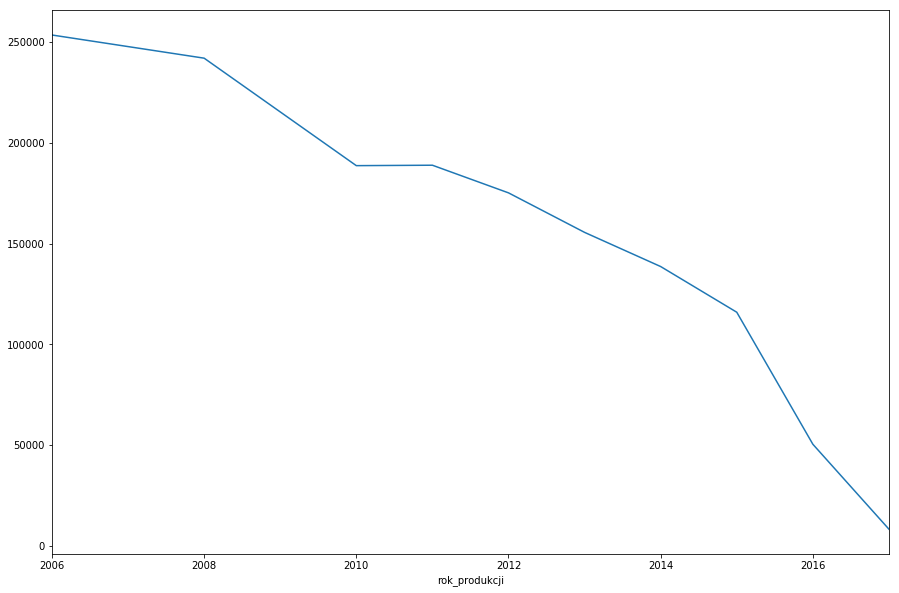

In [8]:
oferty_pogrupowane.przebieg.mean().plot(figsize=ustawienia.rozmiary)

### Wyświetl wykres zależności średniej ceny od rocznika auta.

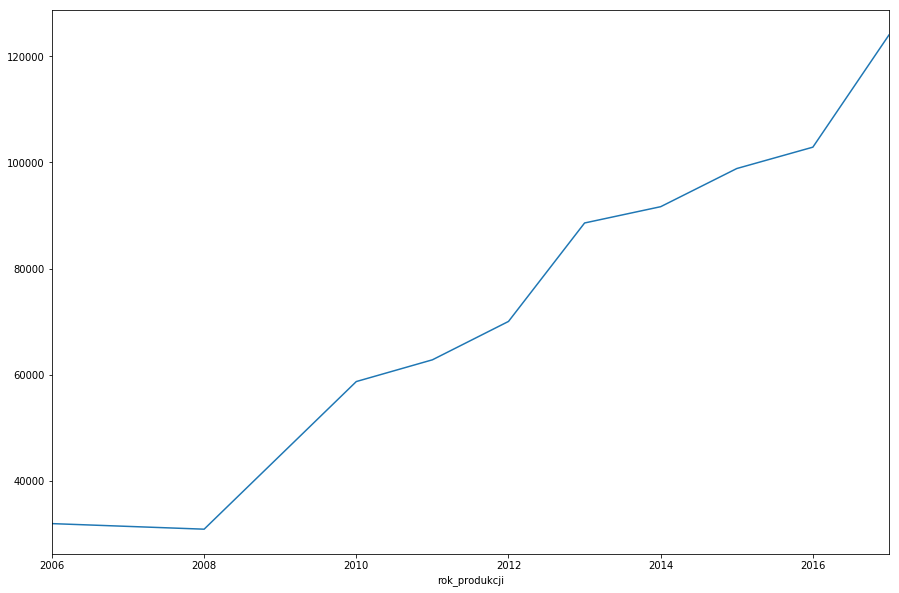

In [9]:
oferty_pogrupowane.cena.mean().plot(figsize=ustawienia.rozmiary)

### Wyświetl wykres kołowy pokazujący udział procentowy ofert w podziale na marki
Zanim wyświetlisz wykres, wykonaj kroki pośrednie.

Krok #1: Przygotuj obiekt `pogrupowane_wg_marek` zawierający pogrupowane oferty

In [10]:
pogrupowane_wg_marek = oferty_df.groupby('marka')

Krok #2: Wyświetl informacje o rozmiarach grup

In [11]:
pogrupowane_wg_marek.size()

marka
BMW           1196
Ford           564
Volkswagen     788
dtype: int64

Krok #3: Wyświetl wykres kołowy dla obiektu `pogrupowane_wg_marek.size()`

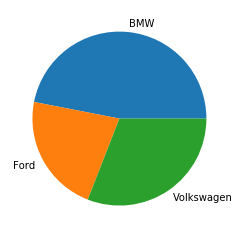

In [12]:
pogrupowane_wg_marek.size().plot(kind="pie", label= "")

Krok #4: Wyświetl wykres kołowy dla obiektu `pogrupowane_wg_marek.size()` z informacją o udziale procentowym

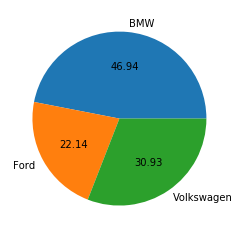

In [13]:
pogrupowane_wg_marek.size().plot(kind="pie", autopct='%.2f', label= "")